Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
TRAIN_PATH = '/content/drive/MyDrive/DATA/Train'
VAL_PATH = '/content/drive/MyDrive/DATA/Validation'


Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.preprocessing import image

Preparing model structure

In [4]:
model = keras.models.Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu', input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer ='adam', metrics = ['accuracy'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                    

In [6]:
# Training from scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1/255,
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale = 1/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 300 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Infected': 0, 'Normal': 1}

In [9]:
validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 92 images belonging to 2 classes.


In [10]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
10/10 [==============================] - 75s 6s/step - loss: 5.0510 - accuracy: 0.5733 - val_loss: 0.6893 - val_accuracy: 0.5469
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 0.5945 - accuracy: 0.7100 - val_loss: 0.3959 - val_accuracy: 0.9219
Epoch 3/10
10/10 [==============================] - 15s 2s/step - loss: 0.2920 - accuracy: 0.8833 - val_loss: 0.1953 - val_accuracy: 0.9219
Epoch 4/10
10/10 [==============================] - 15s 2s/step - loss: 0.2585 - accuracy: 0.9067 - val_loss: 0.1612 - val_accuracy: 0.9375
Epoch 5/10
10/10 [==============================] - 15s 2s/step - loss: 0.3167 - accuracy: 0.8633 - val_loss: 0.3032 - val_accuracy: 0.8750
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: 0.1656 - accuracy: 0.9433 - val_loss: 0.2511 - val_accuracy: 0.9219
Epoch 7/10
10/10 [==============================] - 15s 2s/step - loss: 0.1385 - accuracy: 0.9400 - val_loss: 0.1867 - val_accuracy: 0.9531
Epoch 8/10
10/10 [==

Checking model history

In [13]:
model_summary = hist.history

In [14]:
model_summary

{'accuracy': [0.5733333230018616,
  0.7099999785423279,
  0.8833333253860474,
  0.9066666960716248,
  0.8633333444595337,
  0.9433333277702332,
  0.9399999976158142,
  0.9566666483879089,
  0.9599999785423279,
  0.9766666889190674],
 'loss': [5.050987720489502,
  0.5944873094558716,
  0.29198598861694336,
  0.2585281729698181,
  0.3167177438735962,
  0.16564558446407318,
  0.13851511478424072,
  0.1256961077451706,
  0.11688318848609924,
  0.10854112356901169],
 'val_accuracy': [0.546875,
  0.921875,
  0.921875,
  0.9375,
  0.875,
  0.921875,
  0.953125,
  0.953125,
  0.921875,
  0.953125],
 'val_loss': [0.689254641532898,
  0.39593780040740967,
  0.19531913101673126,
  0.16116422414779663,
  0.3032197058200836,
  0.25105345249176025,
  0.1866900622844696,
  0.13418853282928467,
  0.2575930058956146,
  0.17101123929023743]}

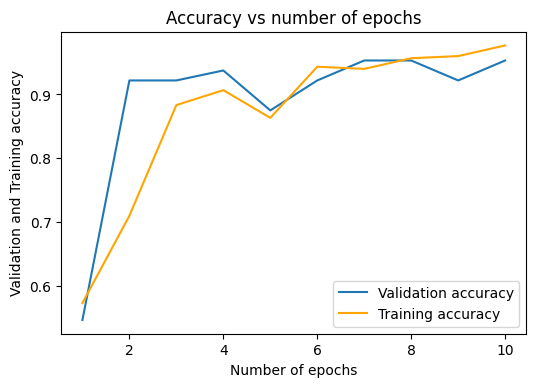

In [23]:
plt.figure(dpi=100)
plt.plot(range(1,11),model_summary['val_accuracy'],label='Validation accuracy')
plt.plot(range(1,11),model_summary['accuracy'],color='orange',label='Training accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Validation and Training accuracy')
plt.title('Accuracy vs number of epochs')
plt.legend()
plt.show()

Saving model weights

In [24]:
model.save('model_adv.h5')

In [25]:
model.evaluate(train_generator)

10/10 [==============================] - 12s 1s/step - loss: 0.0694 - accuracy: 0.9767


[0.06940969824790955, 0.9766666889190674]

In [26]:
model.evaluate(validation_generator)

3/3 [==============================] - 5s 2s/step - loss: 0.1735 - accuracy: 0.9565


[0.1735205501317978, 0.95652174949646]

Test images, due to less availability of lungs images testing data is very small.

In [28]:
model = keras.models.load_model('model_adv.h5')

In [29]:
import os

In [30]:
train_generator.class_indices

{'Infected': 0, 'Normal': 1}

We have total of 6 images, 3 for covid positive people and 3 for normal people.

In [31]:
os.listdir('/content/drive/MyDrive/Covid positive lungs/')

['image_3.png', 'image_2.png', 'image_1.png']

In [31]:
y_actual = []
y_test = []

for i in os.listdir('/content/drive/MyDrive/Covid positive lungs/'):
  img1 = image.load_img('/content/drive/MyDrive/Covid positive lungs/'+i, target_size=(224,224))
  img1 = image.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  p1 = model.predict(img1)
  y_test.append(p1[0,0])
  y_actual.append(0)

for i in os.listdir('/content/drive/MyDrive/Healthy lungs/'):
  img2 = image.load_img('/content/drive/MyDrive/Healthy lungs/'+i, target_size=(224,224))
  img2 = image.img_to_array(img2)
  img2 = np.expand_dims(img2, axis=0)
  p2 = model.predict(img2)
  y_test.append(p2[0,0])
  y_actual.append(1)  

In [32]:
y_actual

[0, 0, 0, 1, 1, 1]

In [33]:
y_test

[0.0, 0.0, 0.0, 1.0, 0.0, 1.0]

In [34]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

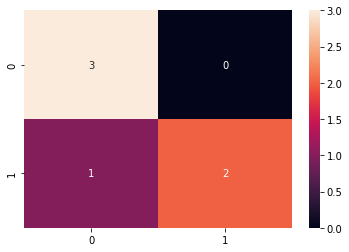

In [36]:
cm = confusion_matrix(y_actual, y_test)
sns.heatmap(cm, annot=True)